In [1]:
%pylab inline
import sys
import importlib
import json
import pandas as pd
import uproot
sys.path.append("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/plots_and_tables/")
import plotter

Populating the interactive namespace from numpy and matplotlib


In [22]:
df = pd.read_pickle("../../Preselection/output/HHggTauTau_InclusivePresel_genZStudy_20210405_new_VH_BDT.pkl")

In [3]:
input_json = json.load(open("../../Preselection/output/HHggTauTau_InclusivePresel_genZStudy_20210405_new_VH_BDT.json"))

In [4]:
with open("plot_options_test.json") as f_in:
    plot_options = json.load(f_in)

In [5]:
plot_options["gg_mass"]["processes"] += ["ZGamma","WGamma","TTGamma",]

In [6]:
plot_options["gg_mass"]["bins"][2] = 50
plot_options["gg_mass"]["ratio_log"] = 0
plot_options["gg_mass"]["ratio_ylim"] = [0,2]

In [7]:
p = plotter.Plotter(df = oneEoneTau, input_options = input_json, plot_options = plot_options, branches = ["gg_mass","ele1_eta"], debug = False, save_plots = False)

NameError: name 'oneEoneTau' is not defined

In [ ]:
p.run()

### BDT variables list

* Baseline BDT
  * N $\tau$
  * N electrons
  * N muons
  * MET $P_T$
  * $m_{\tau\tau}$ SVFit
  * pho1 ID
  * pho2 ID
  * Pt(pho1)/ggMass
  * Pt(pho2)/ggMass
  * eta(pho1)
  * eta(pho2)
  * ele 1 pt (where available)
  * muon 1 pt (where available)
  * tau 1 pt (where available)
  * tau 1 id vs e
  * tau 1 id vs m
  * tau 1 id vs j
* Other features (will add later)
  * tau decay mode
  * Number of b tagged jets
  * Number of jets
  * Delta R (g1, g2)
  * max delta R(g, tau)
  * min delta R(g, tau)


## BDT variables distributions

In [8]:
df.columns

Index(['gg_mass', 'nJet', 'MET_pt', 'MET_phi', 'diphoton_pt_mgg',
       'diphoton_rapidity', 'diphoton_delta_R', 'lead_pho_ptmgg',
       'sublead_pho_ptmgg', 'lead_pho_eta', 'sublead_pho_eta',
       'lead_pho_idmva', 'sublead_pho_idmva', 'lead_pho_phi',
       'sublead_pho_phi', 'ele1_pt', 'ele1_eta', 'ele1_phi', 'ele2_pt',
       'ele2_eta', 'ele2_phi', 'ele1_tightId', 'ele2_tightId', 'muon1_pt',
       'muon1_eta', 'muon1_phi', 'muon2_pt', 'muon2_eta', 'muon2_phi',
       'muon1_tightId', 'muon2_tightId', 'tau1_pt', 'tau1_eta', 'tau1_phi',
       'tau2_pt', 'tau2_eta', 'tau2_phi', 'tau1_id_vs_e', 'tau1_id_vs_m',
       'tau1_id_vs_j', 'tau2_id_vs_e', 'tau2_id_vs_m', 'tau2_id_vs_j', 'n_tau',
       'n_electrons', 'n_muons', 'jet1_pt', 'jet1_eta', 'jet1_id',
       'jet1_bTagDeepFlavB', 'jet2_pt', 'jet2_eta', 'jet2_id',
       'jet2_bTagDeepFlavB', 'pt_tautauSVFitLoose', 'eta_tautauSVFitLoose',
       'phi_tautauSVFitLoose', 'm_tautauSVFitLoose', 'dR_tautauSVFitLoose',
       'dR_gg

In [23]:
#df = df.loc[(df["m_tautauSVFitLoose"] > 0) & (((df["genZ_decayMode"] == 3 ) & (df["process_id"] == 9)) | (df["process_id"] == -1))]
df = pd.read_pickle("../../Preselection/output/HHggTauTau_InclusivePresel_genZStudy_20210405_new_VH_BDT.pkl")
df = df.loc[df["m_tautauSVFitLoose"] > 0]

In [34]:
df.loc[df["tau1_pt"] < 0, "tau1_pt"] = np.nan
df.loc[np.isnan(df["tau1_pt"]), "tau1_eta"] = np.nan
df.loc[np.isnan(df["tau1_pt"]), "tau1_phi"] = np.nan
df.loc[df["tau2_pt"] < 0, "tau2_pt"] = np.nan
df.loc[np.isnan(df["tau2_pt"]), "tau2_eta"] = np.nan
df.loc[np.isnan(df["tau2_pt"]), "tau2_phi"] = np.nan

df.loc[df["ele1_pt"] < 0, "ele1_pt"] = np.nan
df.loc[np.isnan(df["ele1_pt"]), "ele1_eta"] = np.nan
df.loc[np.isnan(df["ele1_pt"]), "ele1_phi"] = np.nan
df.loc[df["ele2_pt"] < 0, "ele2_pt"] = np.nan
df.loc[np.isnan(df["ele2_pt"]), "ele2_eta"] = np.nan
df.loc[np.isnan(df["ele2_pt"]), "ele2_phi"] = np.nan

df.loc[df["muon1_pt"] < 0, "muon1_pt"] = np.nan
df.loc[np.isnan(df["muon1_pt"]), "muon1_eta"] = np.nan
df.loc[np.isnan(df["muon1_pt"]), "muon1_phi"] = np.nan
df.loc[df["muon2_pt"] < 0, "muon2_pt"] = np.nan
df.loc[np.isnan(df["muon2_pt"]), "muon2_eta"] = np.nan
df.loc[np.isnan(df["muon2_pt"]), "muon2_phi"] = np.nan

df.loc[df["jet1_pt"] < 0, "jet1_pt"] = np.nan
df.loc[np.isnan(df["jet1_pt"]), "jet1_eta"] = np.nan
df.loc[np.isnan(df["jet1_pt"]), "jet1_phi"] = np.nan
df.loc[df["jet2_pt"] < 0, "jet2_pt"] = np.nan
df.loc[np.isnan(df["jet2_pt"]), "jet2_eta"] = np.nan
df.loc[np.isnan(df["jet2_pt"]), "jet2_phi"] = np.nan

In [35]:
bdt_p = plotter.Plotter(df = df, input_options = input_json, plot_options = "bdt_distributions.json", branches = "all", debug = False)

[plotter.py] mva_score not found in the dataframe. Skipping..                                .
[plotter.py] mva_without_gen not found in the dataframe. Skipping..                                .
Making plots for branch  gg_mass


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  diphoton_pt_mgg


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  diphoton_rapidity


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  lead_pho_ptmgg


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  sublead_pho_ptmgg


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  lead_pho_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  sublead_pho_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  lead_pho_phi


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  sublead_pho_phi


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  lead_pho_idmva


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  sublead_pho_idmva


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  n_electrons


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  n_muons


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  n_tau


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  pt_tautauSVFitLoose


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  eta_tautauSVFitLoose


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  phi_tautauSVFitLoose


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  m_tautauSVFitLoose


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  ele1_pt


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  ele1_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/plots_and_tables/plotter.py:259: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


Making plots for branch  ele1_phi


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  muon1_pt


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  muon1_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  muon1_phi


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau1_pt


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau1_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau1_phi


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau2_pt


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau2_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau2_phi


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau1_id_vs_e


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau1_id_vs_m


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau1_id_vs_j


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau2_id_vs_e


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau2_id_vs_m


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  tau2_id_vs_j


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  jet1_pt


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  jet1_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  jet1_id


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  jet2_pt


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  jet2_eta


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  jet2_id


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  dR_tautauSVFitLoose


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  dR_ggtautauSVFitLoose


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  diphoton_delta_R


'FiraMath-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Making plots for branch  mva_with_gen


KeyError: 'mva_with_gen'

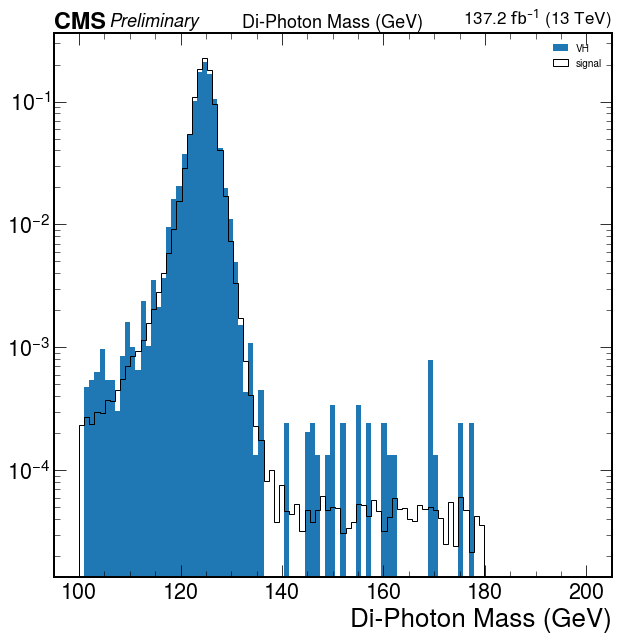

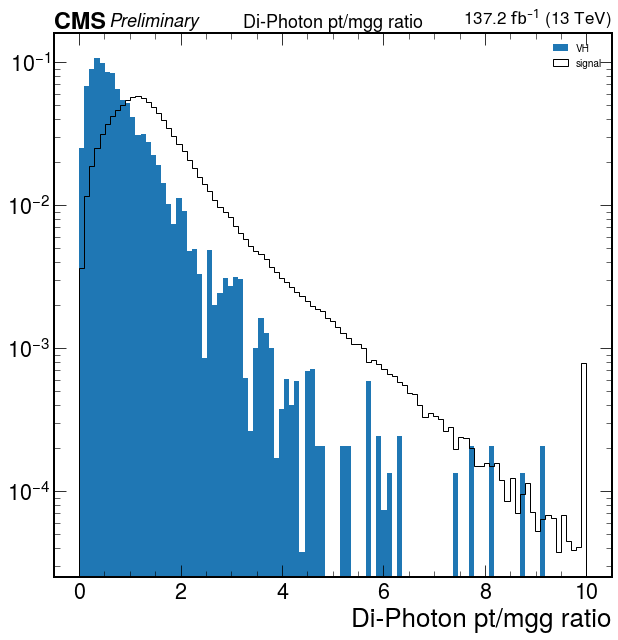

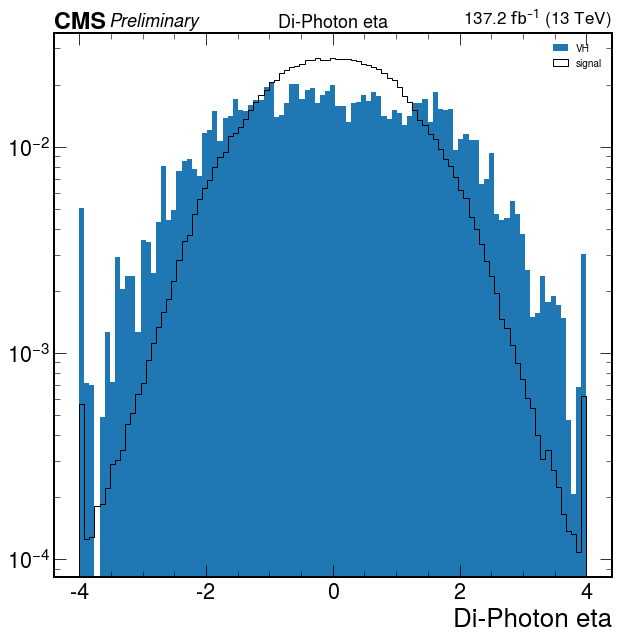

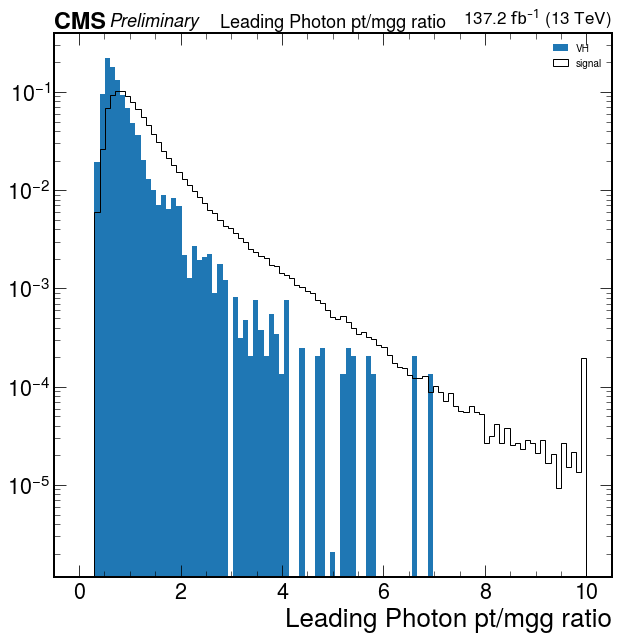

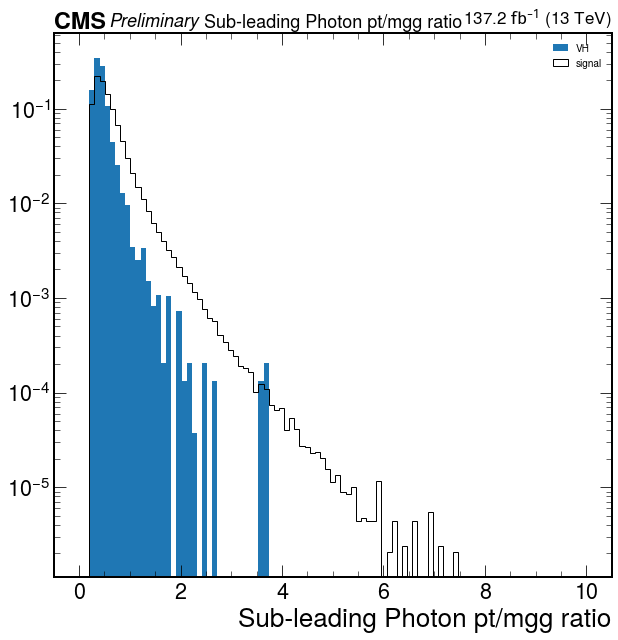

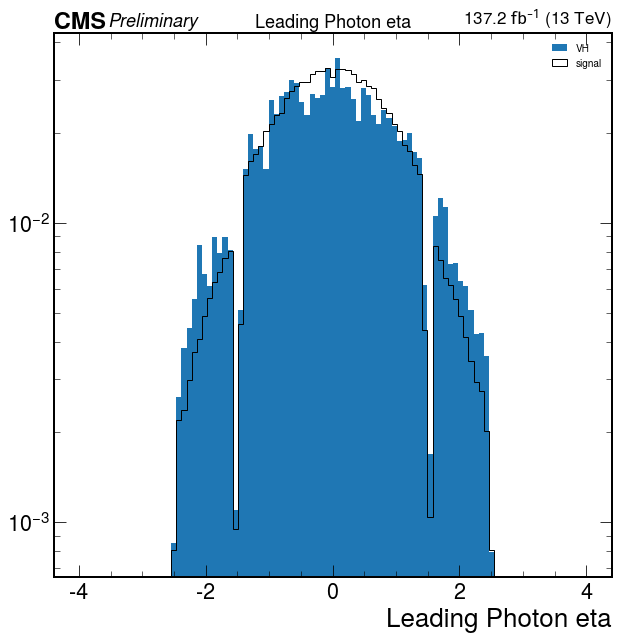

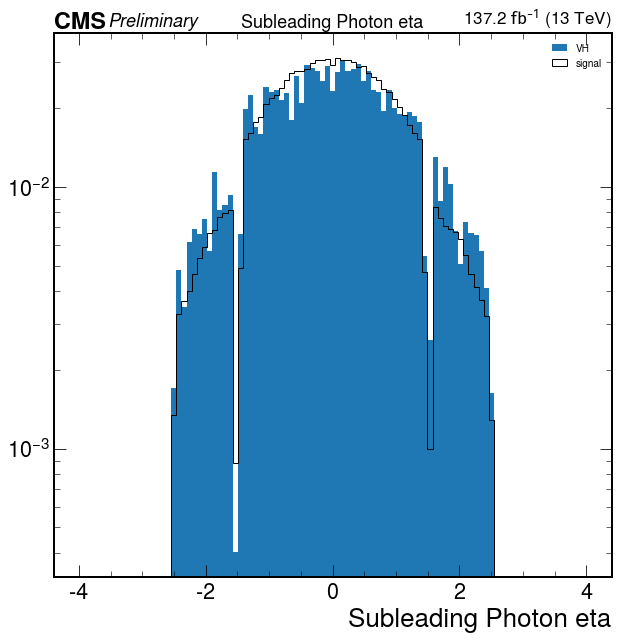

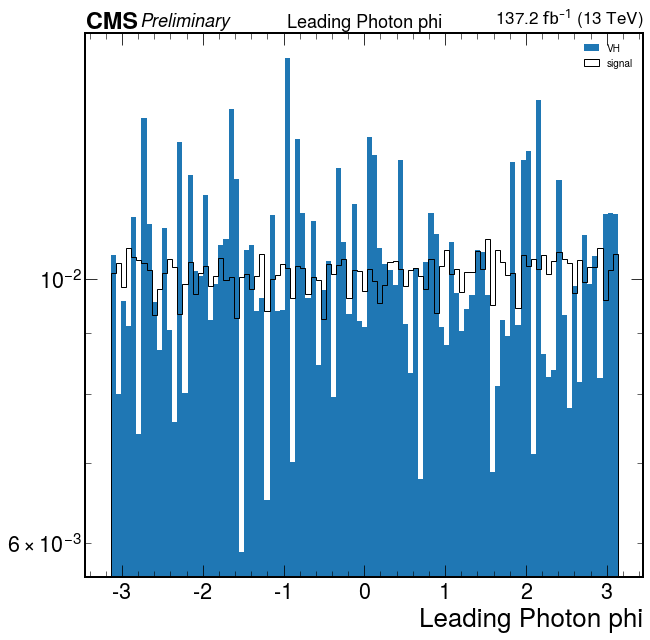

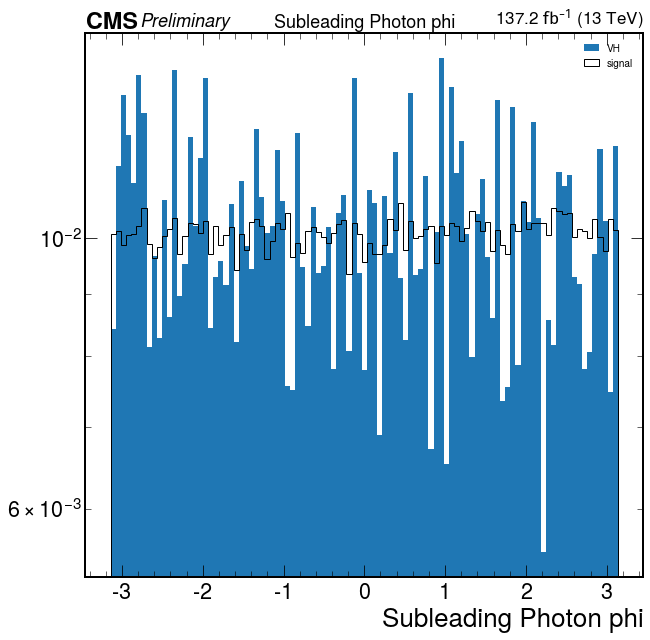

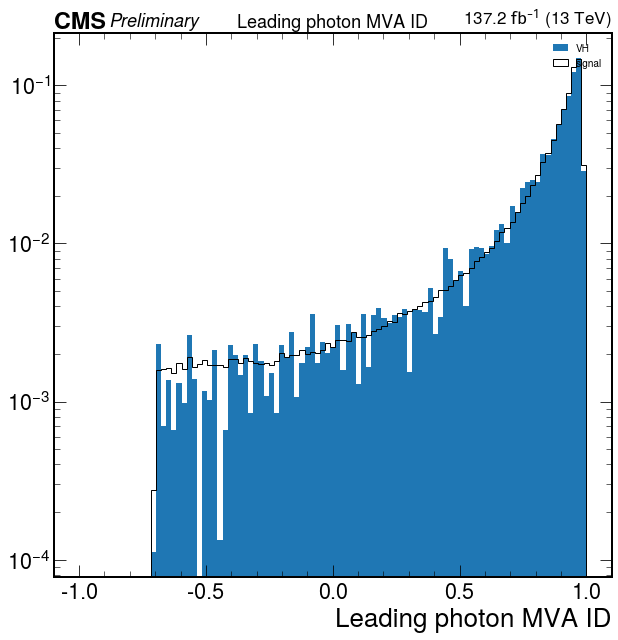

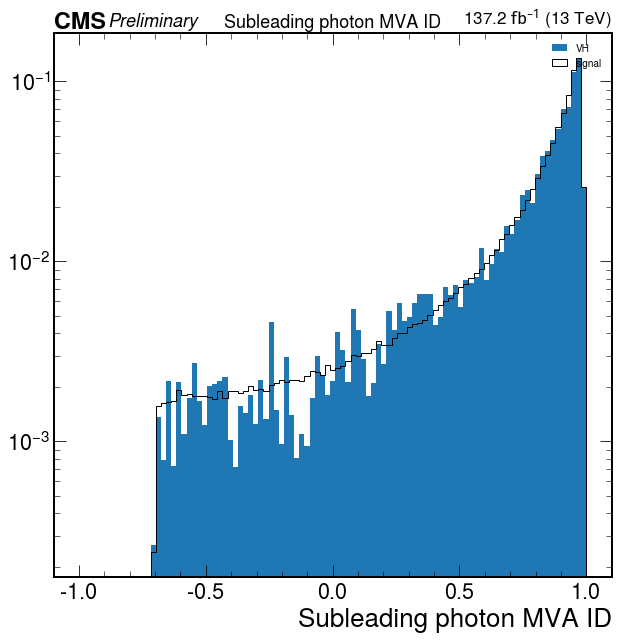

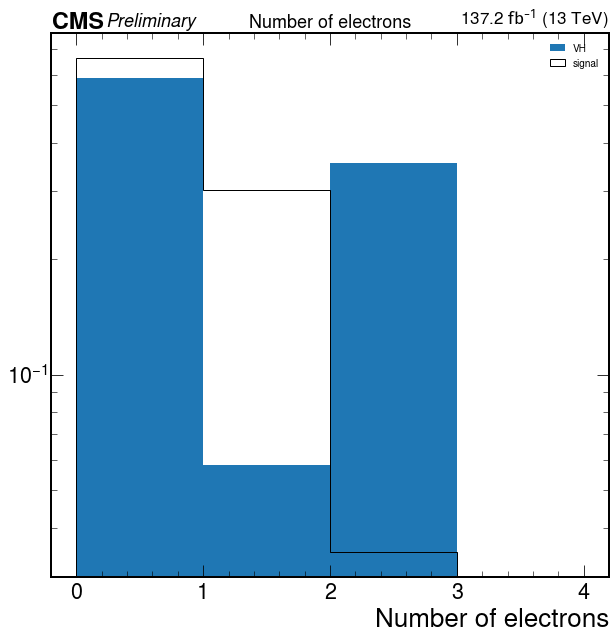

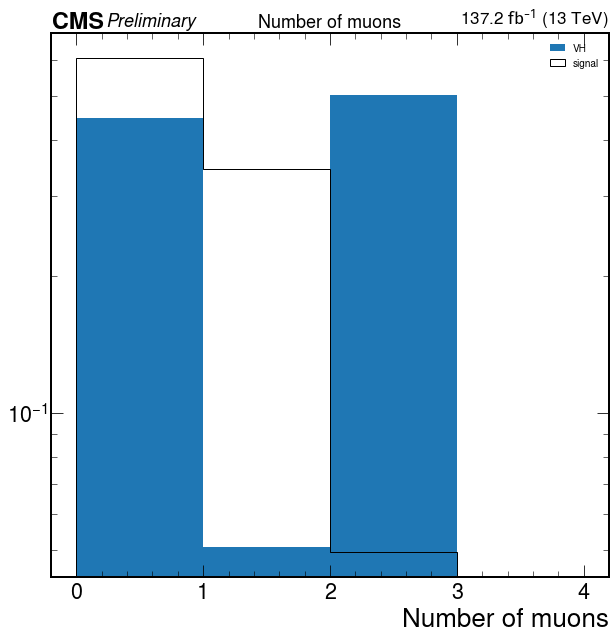

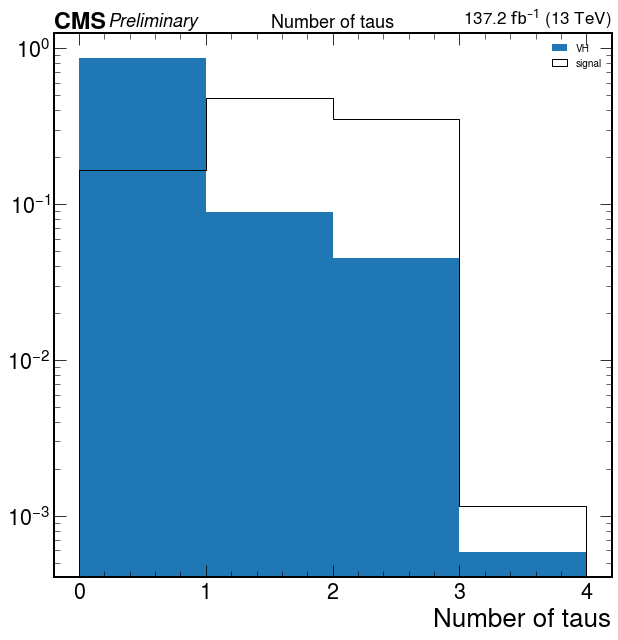

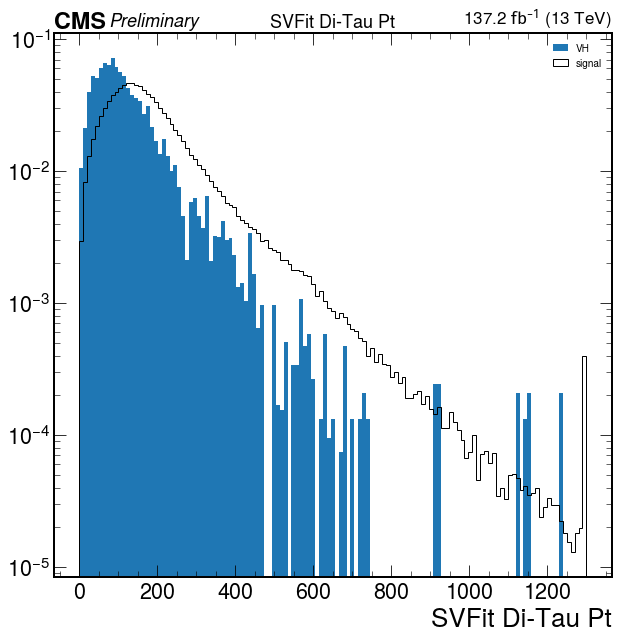

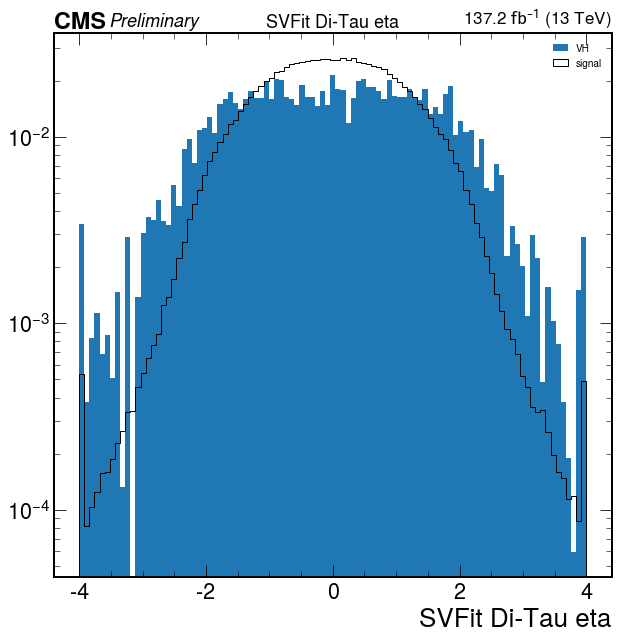

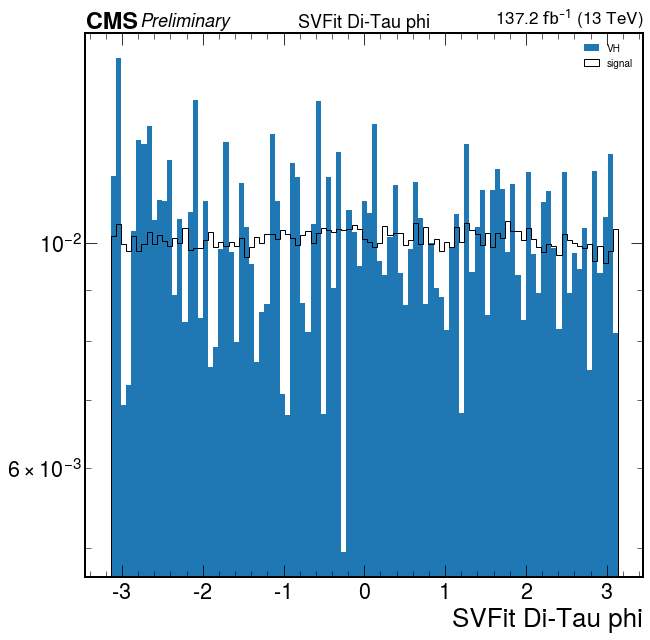

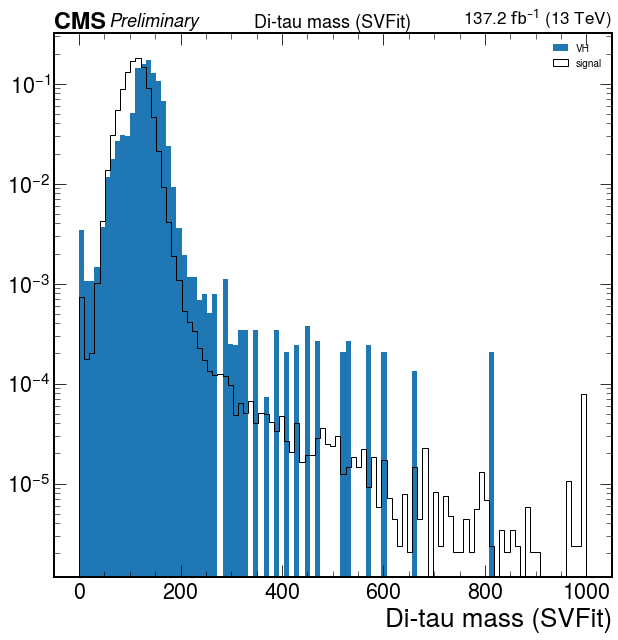

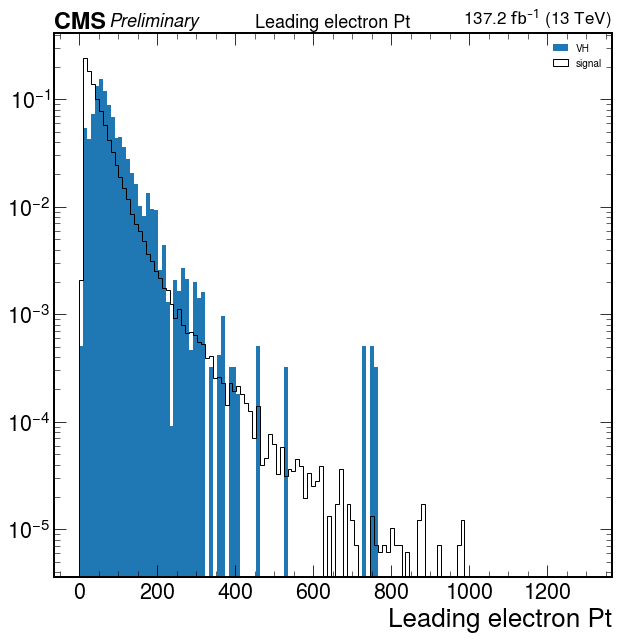

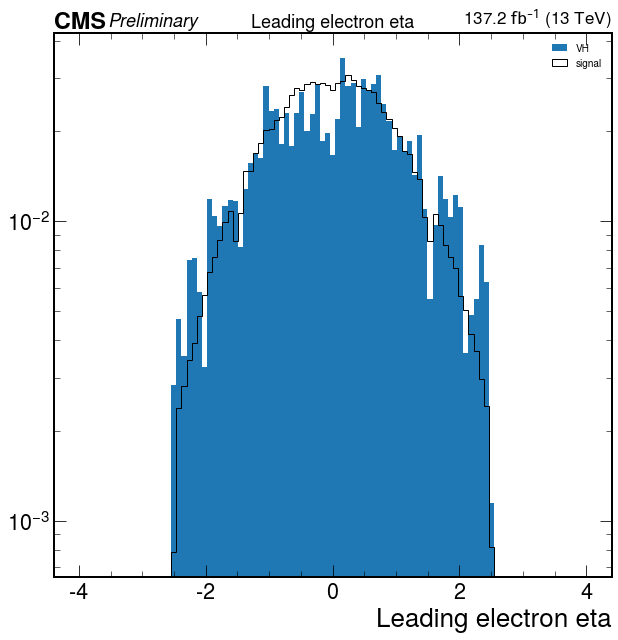

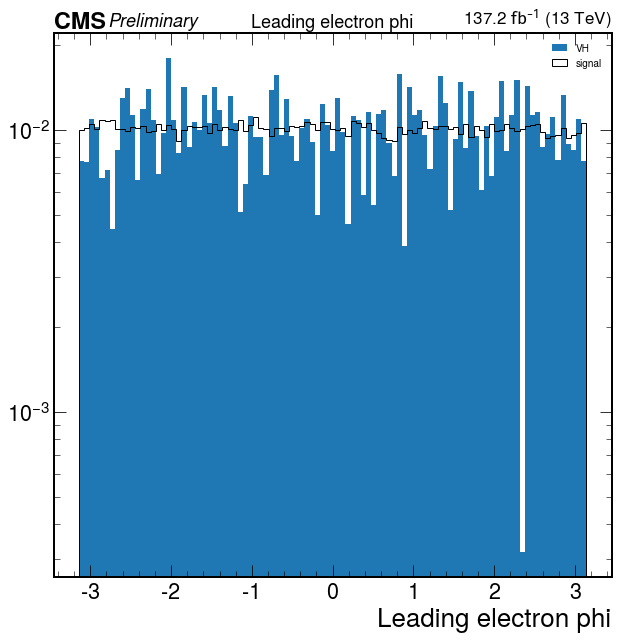

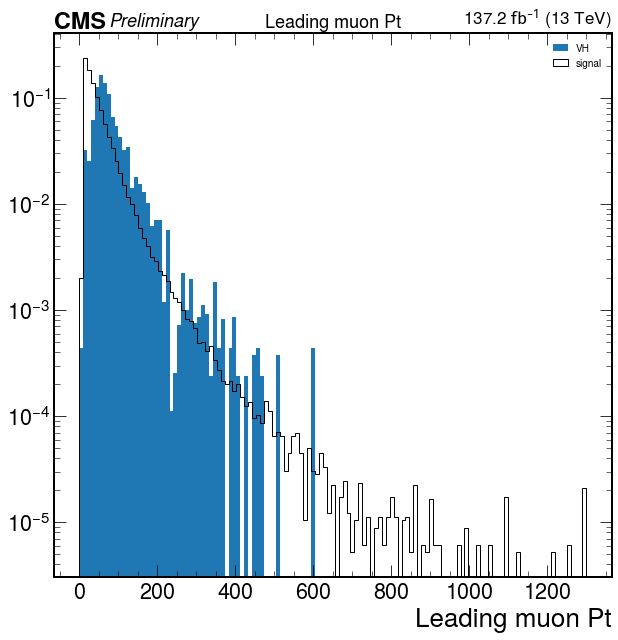

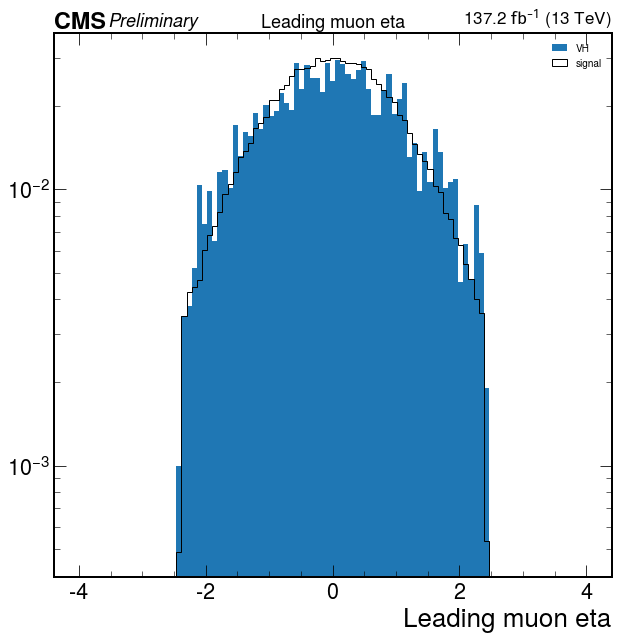

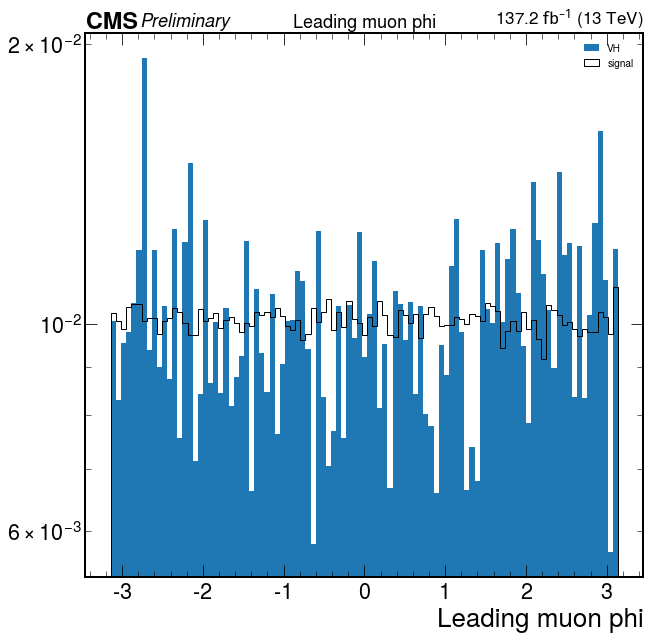

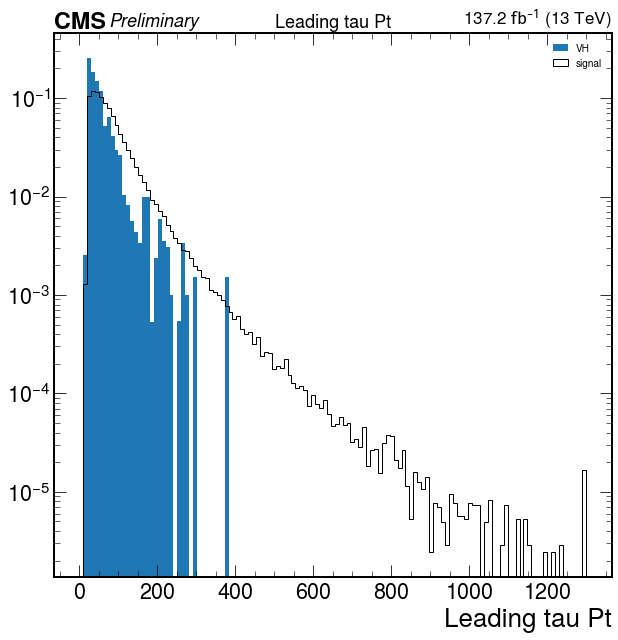

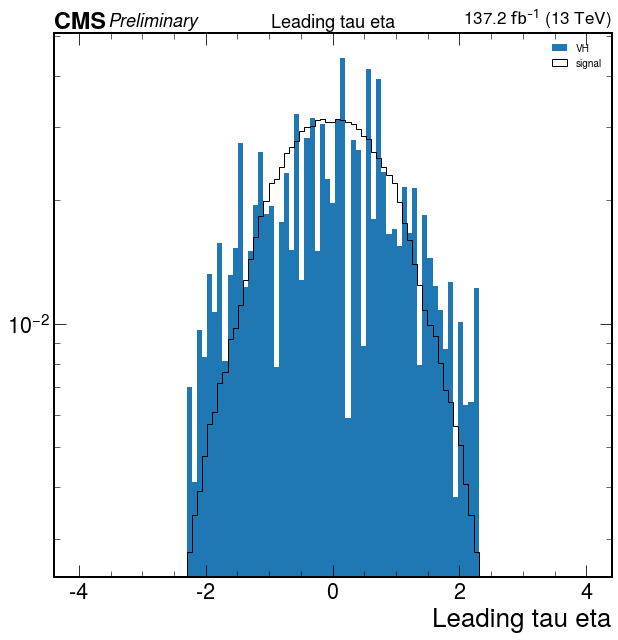

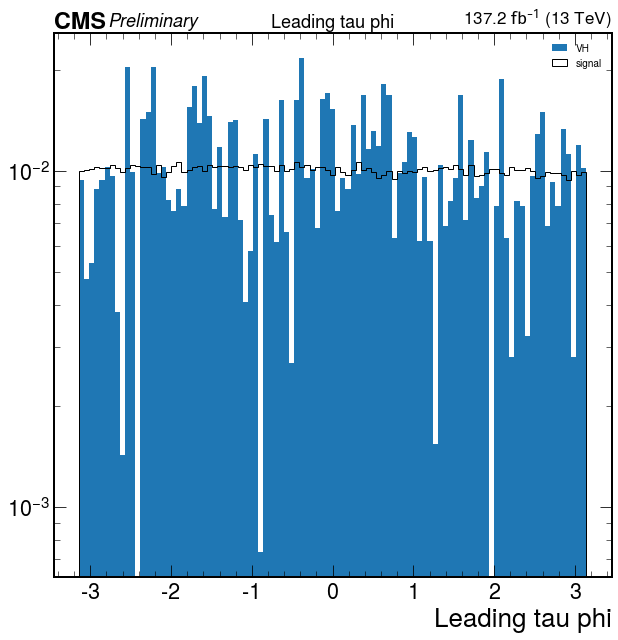

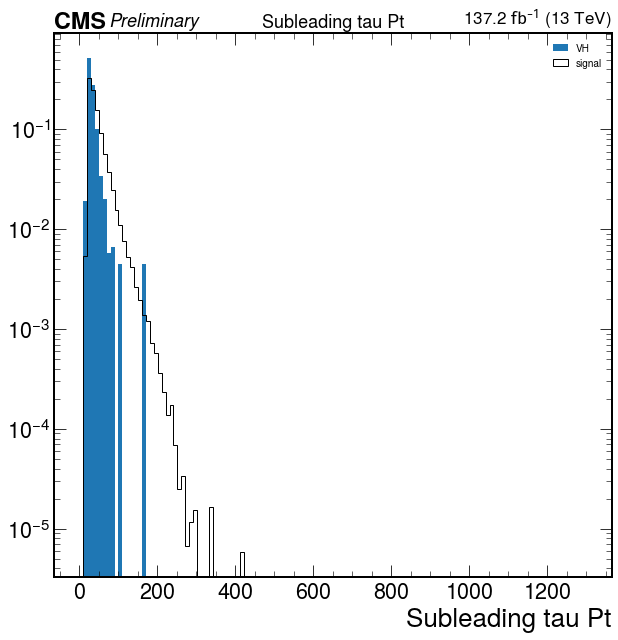

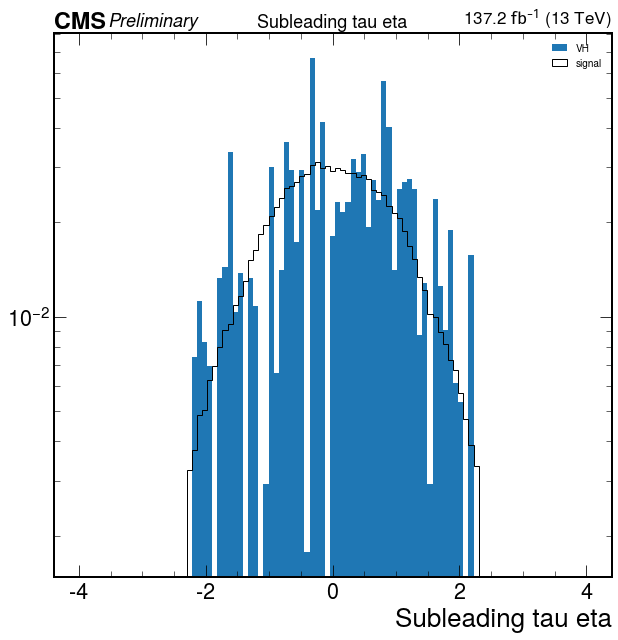

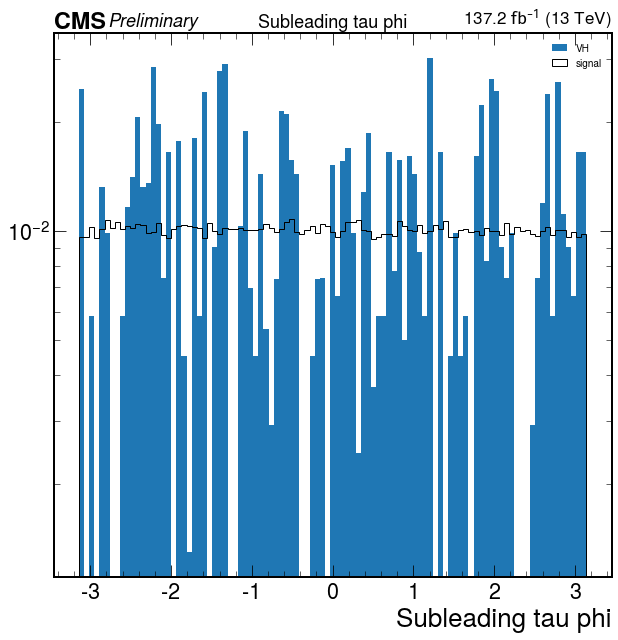

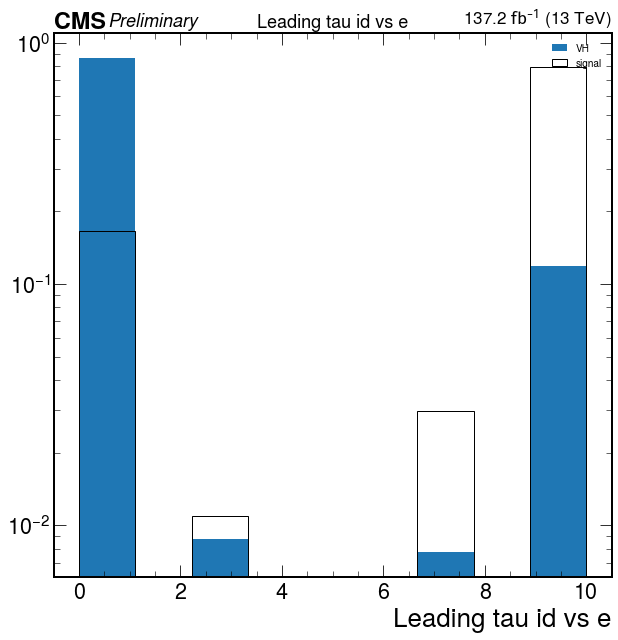

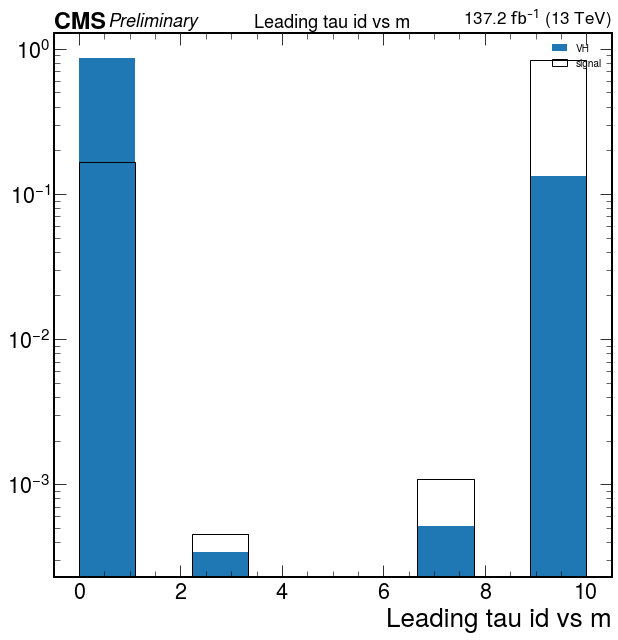

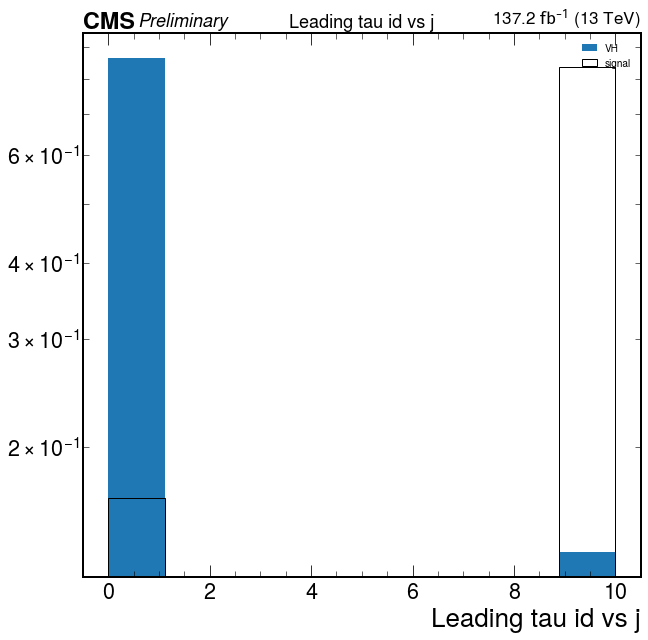

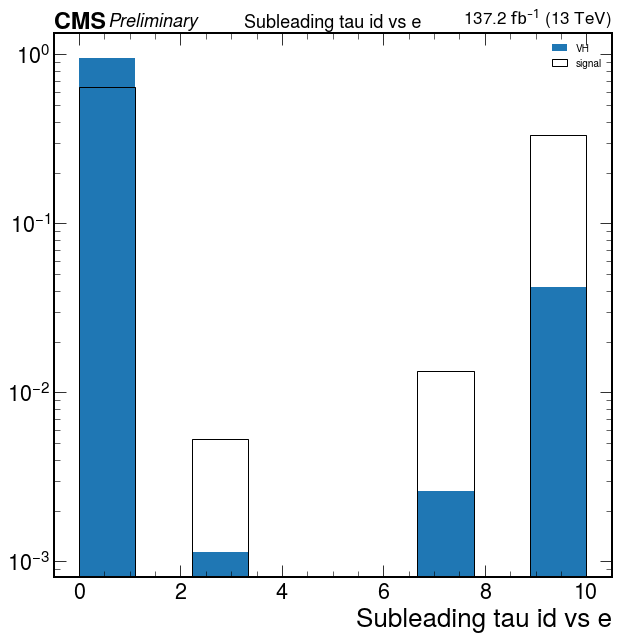

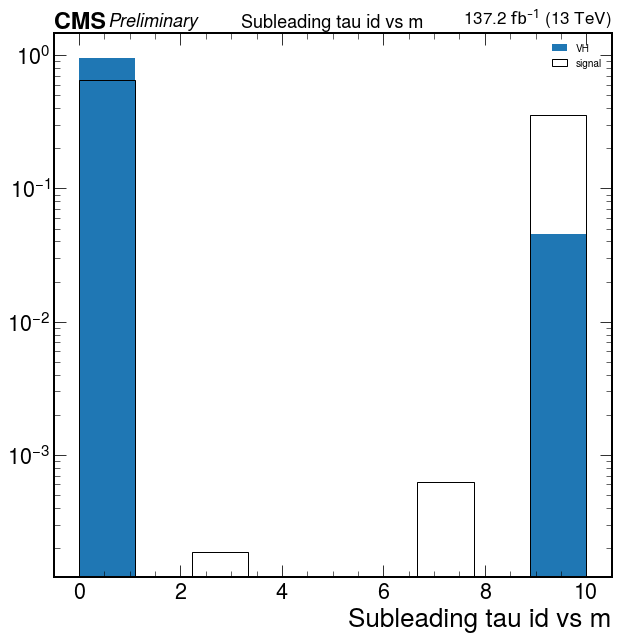

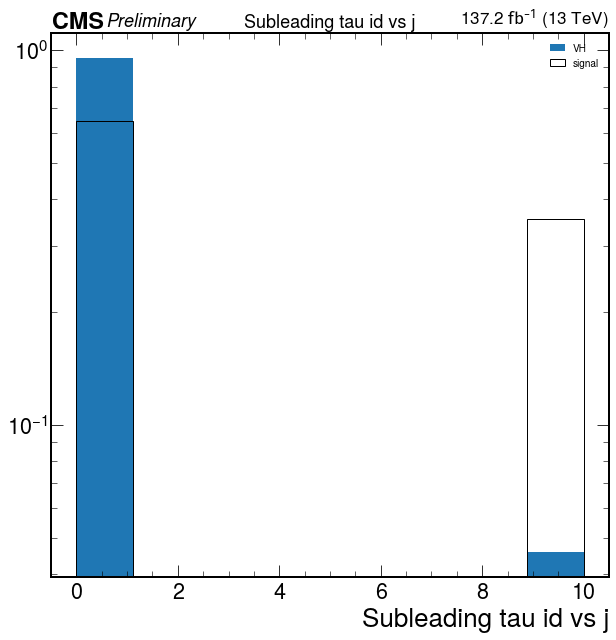

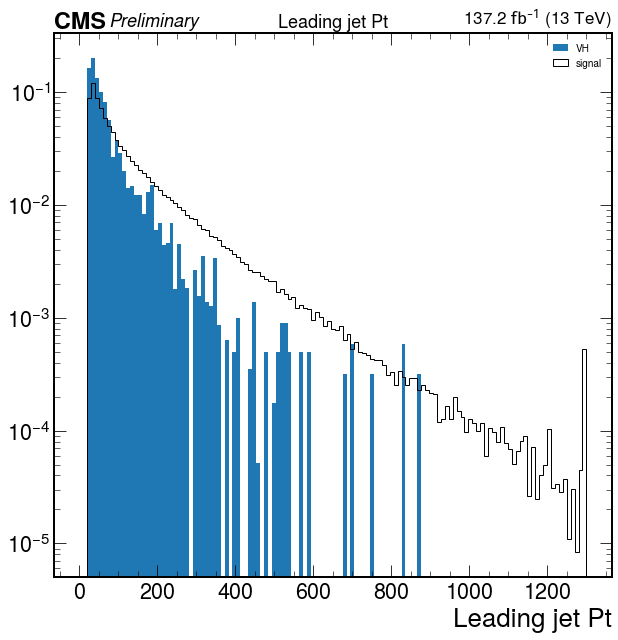

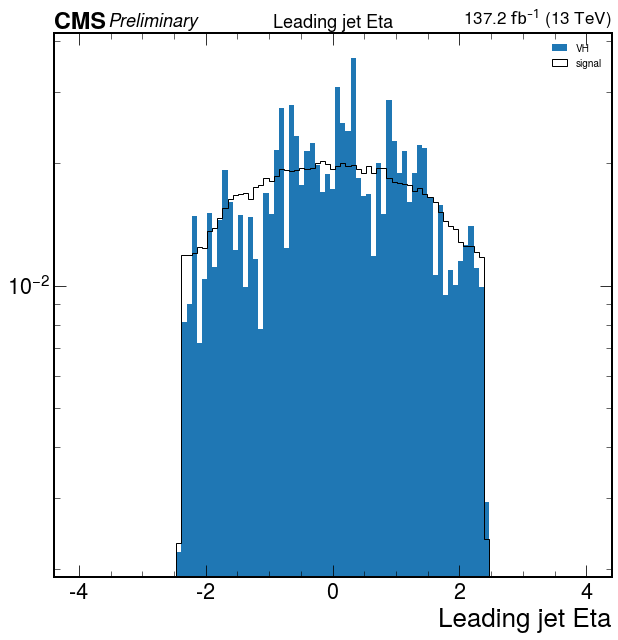

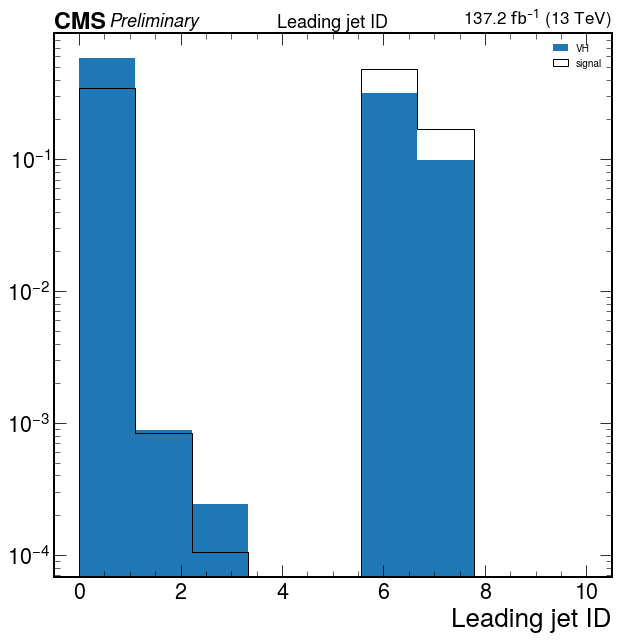

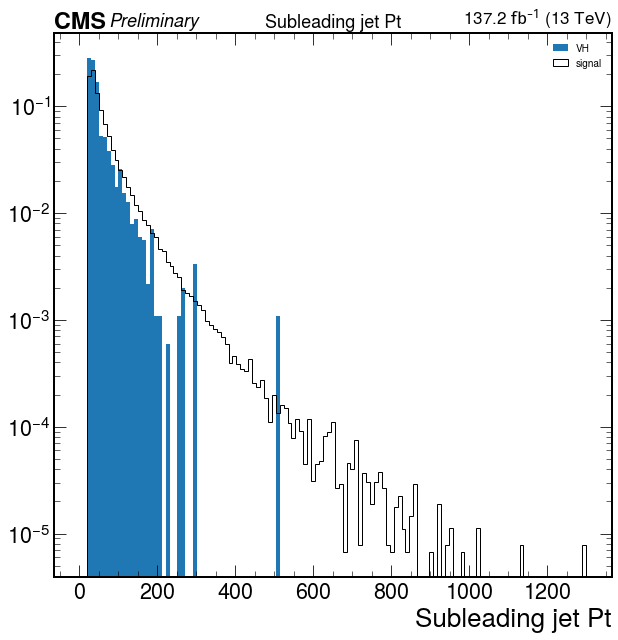

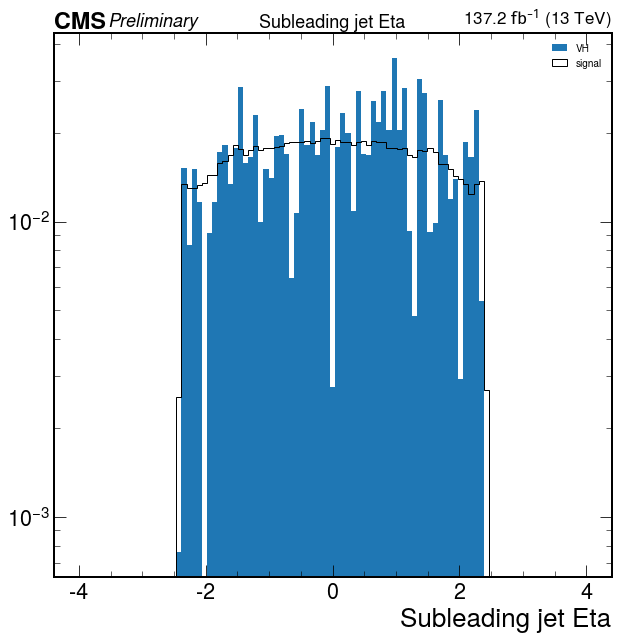

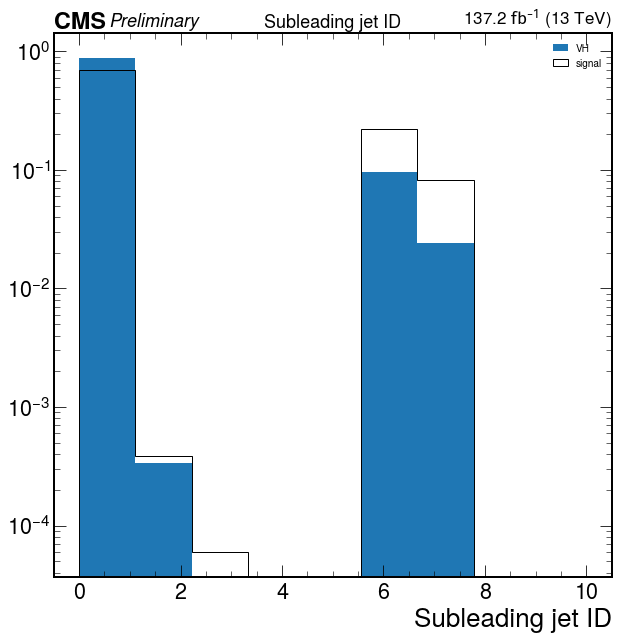

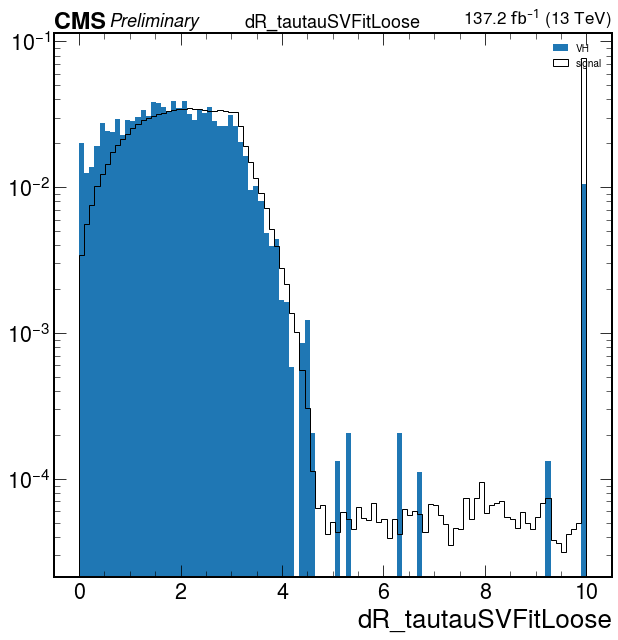

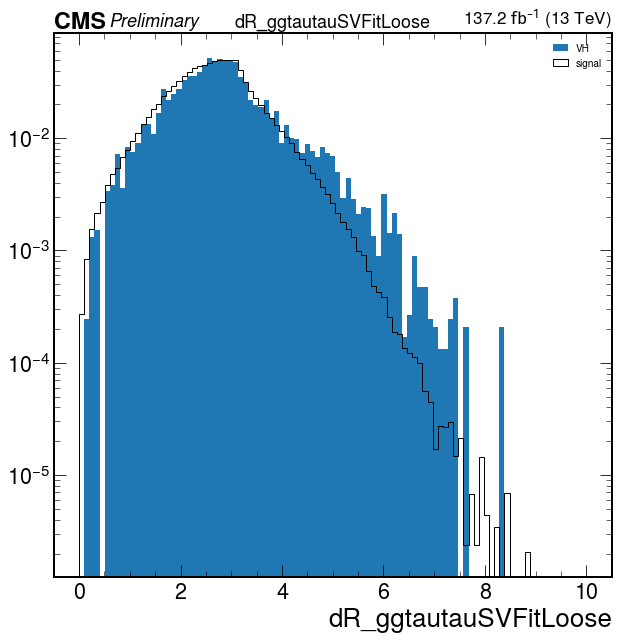

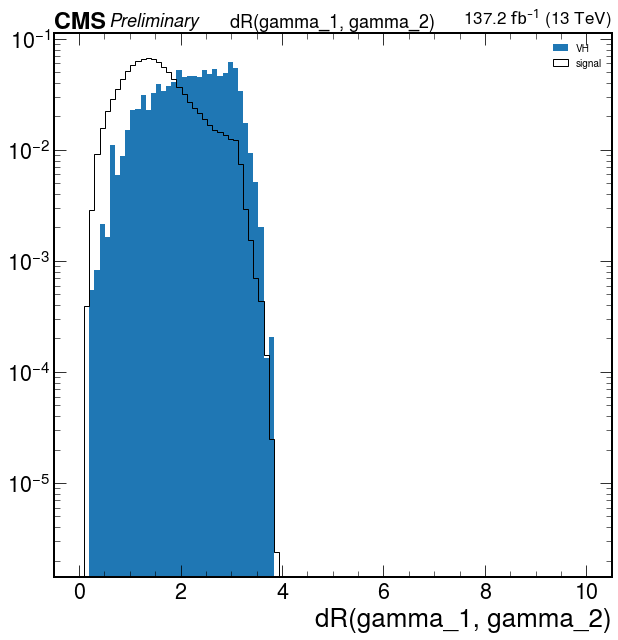

In [36]:
bdt_p.run()

In [37]:
df["tau1_pt"]

0           28.767668
3          116.766396
8           43.998455
10          83.494331
13          47.154747
              ...    
1164861           NaN
1164869     48.300140
1164889           NaN
1164938           NaN
1164941           NaN
Name: tau1_pt, Length: 390287, dtype: float64

<AxesSubplot:>

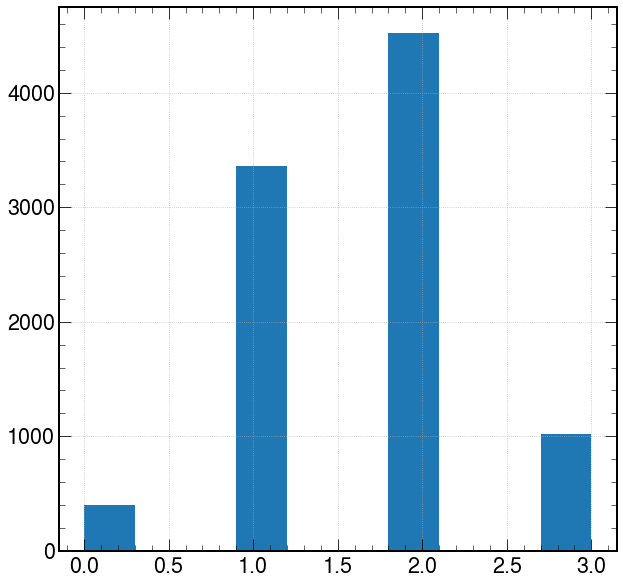

In [39]:
df.loc[df["process_id"] == 9, "genZ_decayMode"].hist()
plt.savefig("decayMode_check.pdf")

In [ ]:
df.loc[df[""]]

<AxesSubplot:>

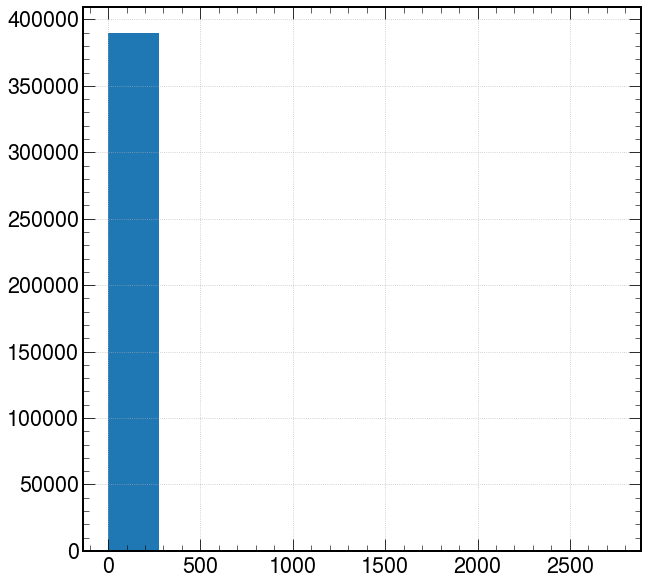

In [41]:
df["m_tautauSVFitLoose"].hist()

### Post training

In [96]:
df = pd.read_pickle("../../MVAs/output/HHggTauTau_InclusivePresel_genZStudy_20210405_new_VH_BDT_with_scores.pkl")

In [97]:
df = df.loc[df["m_tautauSVFitLoose"] > 0]

In [98]:
bdt_p = plotter.Plotter(df = df.loc[df["train_label"] == 2] , input_options = input_json, plot_options = "bdt_distributions.json", branches = ["mva_with_gen","mva_without_gen","mva_no_selection"], debug = True)

[plotter.py] Loaded dataframe and options


[plotter.py] sample =  Data
[plotter.py] sample =  DiPhoton
[plotter.py] sample =  GJets_HT-100To200
[plotter.py] sample =  GJets_HT-200To400
[plotter.py] sample =  GJets_HT-400To600
[plotter.py] sample =  GJets_HT-600ToInf
[plotter.py] sample =  GJets_HT40To100
[plotter.py] sample =  HH_ggTauTau
[plotter.py] sample =  HH_ggWW_dileptonic
[plotter.py] sample =  HH_ggWW_semileptonic
[plotter.py] sample =  HH_ggZZ
[plotter.py] sample =  TTGG
[plotter.py] sample =  TTGamma
[plotter.py] sample =  TTbar
[plotter.py] sample =  VH
[plotter.py] sample =  WGamma
[plotter.py] sample =  ZGamma
Making plots for branch  mva_with_gen
[plotter.py] No stacking for branch  mva_with_gen
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_with_gen.pdf
Making plots for branch  mva_without_gen
[plotter.py] No stacking for branch  mva_without_gen
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_without_gen.pdf
Making plots for branch  mva_no_selection
[plotter.py] No stacking for branch  mva_no_selection
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_no_selection.pdf


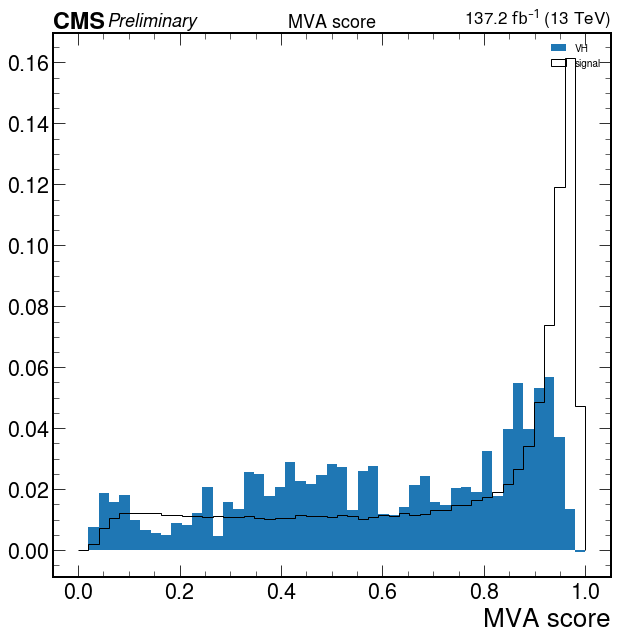

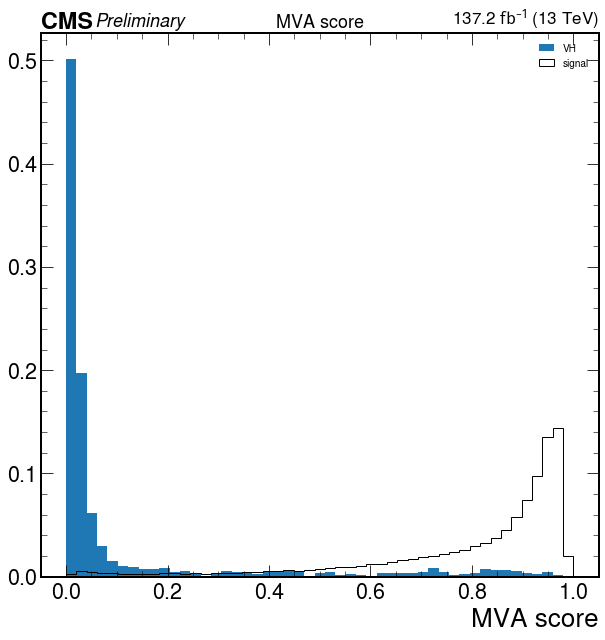

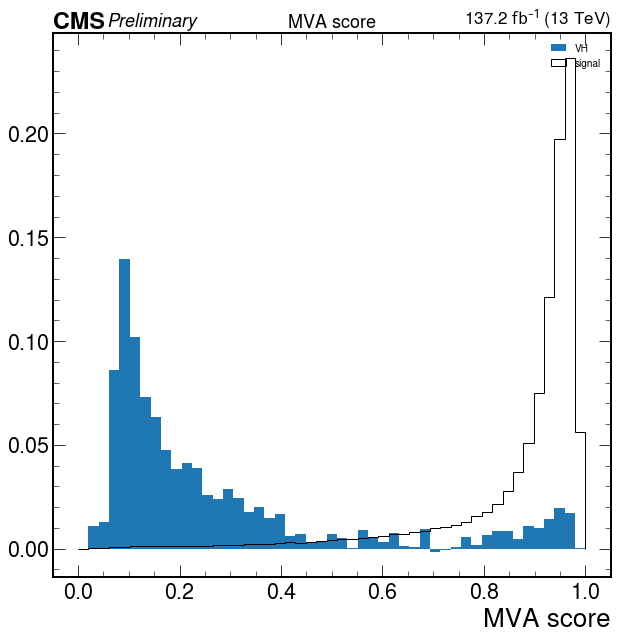

In [99]:
bdt_p.run()

In [52]:
vh_normalized = bdt_p.histograms["mva_with_gen"]["VH"]/bdt_p.histograms["mva_with_gen"]["VH"].integral
signal_normalized = bdt_p.histograms["mva_with_gen"]["signal"]/bdt_p.histograms["mva_with_gen"]["signal"].integral

In [53]:
signal_normalized

[ 0.00 ± 0.00    0.00 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.02 ± 0.00    0.02 ± 0.00
  0.02 ± 0.00    0.02 ± 0.00    0.03 ± 0.00    0.03 ± 0.00    0.05 ± 0.00
  0.07 ± 0.00    0.12 ± 0.00    0.16 ± 0.00    0.05 ± 0.00]

In [54]:
vh_normalized

[ 0.00 ± 0.00    0.01 ± 0.00    0.02 ± 0.00    0.02 ± 0.00    0.02 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.00 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.02 ± 0.00    0.00 ± 0.00    0.02 ± 0.00
  0.01 ± 0.00    0.03 ± 0.00    0.02 ± 0.00    0.02 ± 0.00    0.02 ± 0.00
  0.03 ± 0.00    0.02 ± 0.00    0.02 ± 0.00    0.02 ± 0.01    0.03 ± 0.00
  0.03 ± 0.00    0.01 ± 0.00    0.03 ± 0.00    0.03 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.02 ± 0.00    0.02 ± 0.00    0.02 ± 0.00
  0.01 ± 0.00    0.02 ± 0.00    0.02 ± 0.01    0.02 ± 0.00    0.03 ± 0.01
  0.02 ± 0.00    0.04 ± 0.01    0.05 ± 0.01    0.04 ± 0.01    0.05 ± 0.01
  0.06 ± 0.01    0.04 ± 0.01    0.01 ± 0.00   -0.00 ± 0.00]

In [61]:
sum(vh_normalized.counts[vh_normalized.counts < signal_normalized.counts])

0.17335369609605156

In [62]:
sum(signal_normalized.counts[vh_normalized.counts < signal_normalized.counts])

0.5027021551602138

In [65]:
vh_normalized_no_gen = bdt_p.histograms["mva_without_gen"]["VH"]/bdt_p.histograms["mva_without_gen"]["VH"].integral
signal_normalized_no_gen = bdt_p.histograms["mva_without_gen"]["signal"]/bdt_p.histograms["mva_without_gen"]["signal"].integral

In [66]:
signal_normalized_no_gen

[ 0.00 ± 0.00    0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.02 ± 0.00    0.02 ± 0.00    0.02 ± 0.00
  0.02 ± 0.00    0.02 ± 0.00    0.02 ± 0.00    0.03 ± 0.00    0.03 ± 0.00
  0.03 ± 0.00    0.04 ± 0.00    0.05 ± 0.00    0.06 ± 0.00    0.07 ± 0.00
  0.10 ± 0.00    0.14 ± 0.00    0.14 ± 0.00    0.02 ± 0.00]

In [67]:
vh_normalized_no_gen

[ 0.50 ± 0.02    0.20 ± 0.02    0.06 ± 0.01    0.03 ± 0.01    0.02 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.00 ± 0.00    0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00]

In [75]:
sum(vh_normalized_no_gen.counts[vh_normalized_no_gen.counts < signal_normalized_no_gen.counts])

0.12630937689042615

In [76]:
sum(signal_normalized_no_gen.counts[vh_normalized_no_gen.counts < signal_normalized_no_gen.counts])

0.9464027683582878

In [104]:
bdt_p.histograms["mva_no_selection"]["VH"].integral

1.5318882867577486

In [77]:
vh_normalized_no_selection = bdt_p.histograms["mva_no_selection"]["VH"]/bdt_p.histograms["mva_no_selection"]["VH"].integral
signal_normalized_no_selection = bdt_p.histograms["mva_no_selection"]["signal"]/bdt_p.histograms["mva_no_selection"]["signal"].integral

In [78]:
vh_normalized_no_selection

[ 0.00 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.09 ± 0.01    0.14 ± 0.01
  0.10 ± 0.01    0.07 ± 0.01    0.06 ± 0.01    0.05 ± 0.01    0.04 ± 0.01
  0.04 ± 0.01    0.04 ± 0.01    0.03 ± 0.01    0.02 ± 0.01    0.03 ± 0.01
  0.02 ± 0.01    0.02 ± 0.00    0.02 ± 0.00    0.01 ± 0.00    0.02 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.01 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.00 ± 0.00
  0.01 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.01 ± 0.00   -0.00 ± 0.00
 -0.00 ± 0.00    0.00 ± 0.00    0.01 ± 0.00    0.00 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.00 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.02 ± 0.00    0.02 ± 0.00    0.00 ± 0.00]

In [72]:
signal_normalized_no_selection

[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00
  0.01 ± 0.00    0.01 ± 0.00    0.01 ± 0.00    0.02 ± 0.00    0.02 ± 0.00
  0.02 ± 0.00    0.03 ± 0.00    0.04 ± 0.00    0.05 ± 0.00    0.07 ± 0.00
  0.12 ± 0.00    0.20 ± 0.00    0.24 ± 0.00    0.06 ± 0.00]

In [73]:
sum(vh_normalized_no_selection.counts[vh_normalized_no_selection.counts < signal_normalized_no_selection.counts])

0.12351319302097777

In [74]:
sum(signal_normalized_no_selection.counts[vh_normalized_no_selection.counts < signal_normalized_no_selection.counts])

0.939209193913034

### Checking training set accuracy (to verify if the BDTs got overfit)

In [86]:
bdt_p_temp = plotter.Plotter(df = df.loc[df["train_label"] == 0] , input_options = input_json, plot_options = "bdt_distributions.json", branches = ["mva_with_gen","mva_without_gen","mva_no_selection"], debug = True)

[plotter.py] Loaded dataframe and options


[plotter.py] sample =  Data
[plotter.py] sample =  DiPhoton
[plotter.py] sample =  GJets_HT-100To200
[plotter.py] sample =  GJets_HT-200To400
[plotter.py] sample =  GJets_HT-400To600
[plotter.py] sample =  GJets_HT-600ToInf
[plotter.py] sample =  GJets_HT40To100
[plotter.py] sample =  HH_ggTauTau
[plotter.py] sample =  HH_ggWW_dileptonic
[plotter.py] sample =  HH_ggWW_semileptonic
[plotter.py] sample =  HH_ggZZ
[plotter.py] sample =  TTGG
[plotter.py] sample =  TTGamma
[plotter.py] sample =  TTbar
[plotter.py] sample =  VH
[plotter.py] sample =  WGamma
[plotter.py] sample =  ZGamma
Making plots for branch  mva_with_gen
[plotter.py] No stacking for branch  mva_with_gen
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_with_gen.pdf
Making plots for branch  mva_without_gen
[plotter.py] No stacking for branch  mva_without_gen
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_without_gen.pdf
Making plots for branch  mva_no_selection
[plotter.py] No stacking for branch  mva_no_selection
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_no_selection.pdf


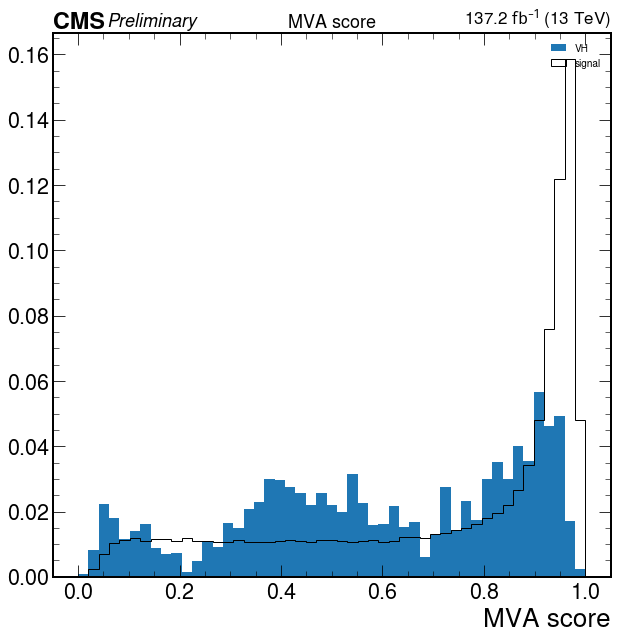

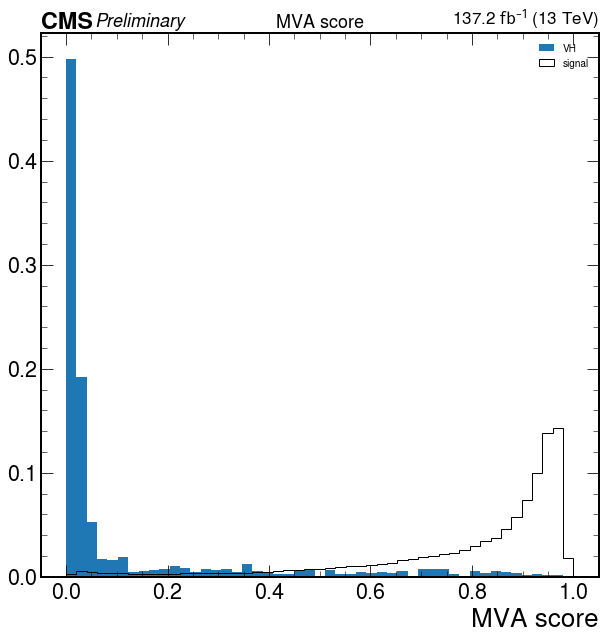

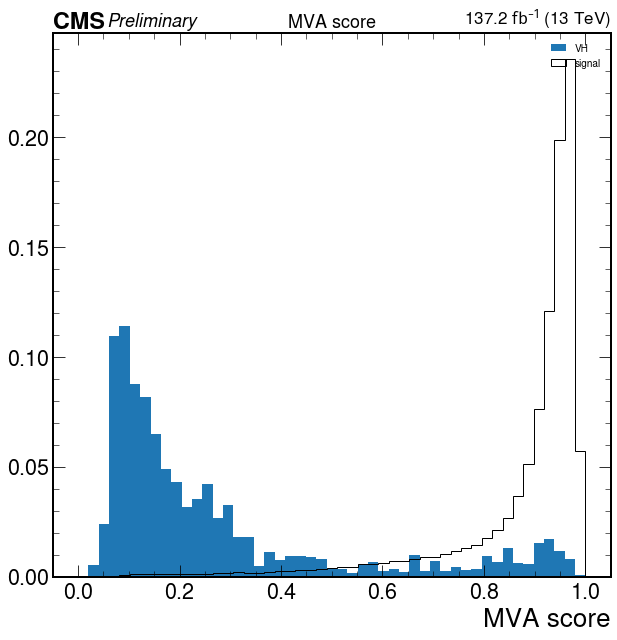

In [87]:
bdt_p_temp.run()

## Gen Matching stuff

In [100]:
bdt_p_temp = plotter.Plotter(df = df.loc[(df["train_label"] == 2) & ((df["process_id"] == -1.0) | ((df["process_id"] == 9.0) & (df["genZ_decayMode"] == 3)))] , input_options = input_json, plot_options = "bdt_distributions.json", branches = ["mva_with_gen","mva_without_gen","mva_no_selection"], debug = True)

[plotter.py] Loaded dataframe and options


[plotter.py] sample =  Data
[plotter.py] sample =  DiPhoton
[plotter.py] sample =  GJets_HT-100To200
[plotter.py] sample =  GJets_HT-200To400
[plotter.py] sample =  GJets_HT-400To600
[plotter.py] sample =  GJets_HT-600ToInf
[plotter.py] sample =  GJets_HT40To100
[plotter.py] sample =  HH_ggTauTau
[plotter.py] sample =  HH_ggWW_dileptonic
[plotter.py] sample =  HH_ggWW_semileptonic
[plotter.py] sample =  HH_ggZZ
[plotter.py] sample =  TTGG
[plotter.py] sample =  TTGamma
[plotter.py] sample =  TTbar
[plotter.py] sample =  VH
[plotter.py] sample =  WGamma
[plotter.py] sample =  ZGamma
Making plots for branch  mva_with_gen
[plotter.py] No stacking for branch  mva_with_gen
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_with_gen.pdf
Making plots for branch  mva_without_gen
[plotter.py] No stacking for branch  mva_without_gen
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_without_gen.pdf
Making plots for branch  mva_no_selection
[plotter.py] No stacking for branch  mva_no_selection
[plotter.py] Setting linear scale for y axis


'FiraMath-Book.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


[plotter.py] Saved plot at mva_no_selection.pdf


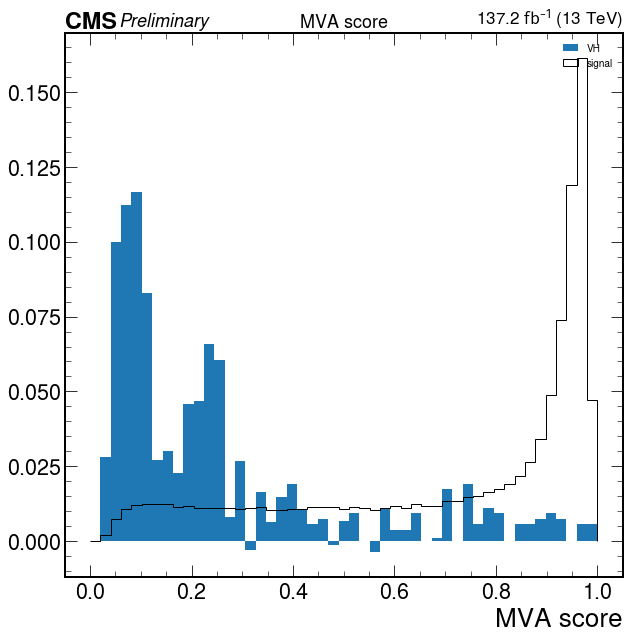

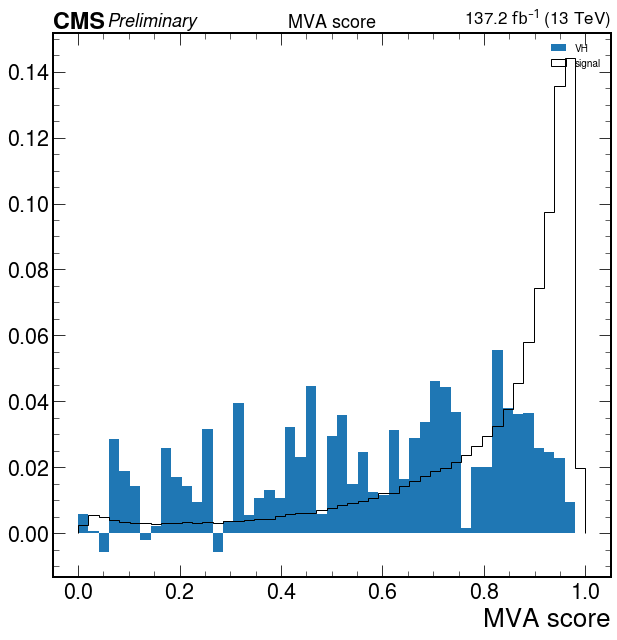

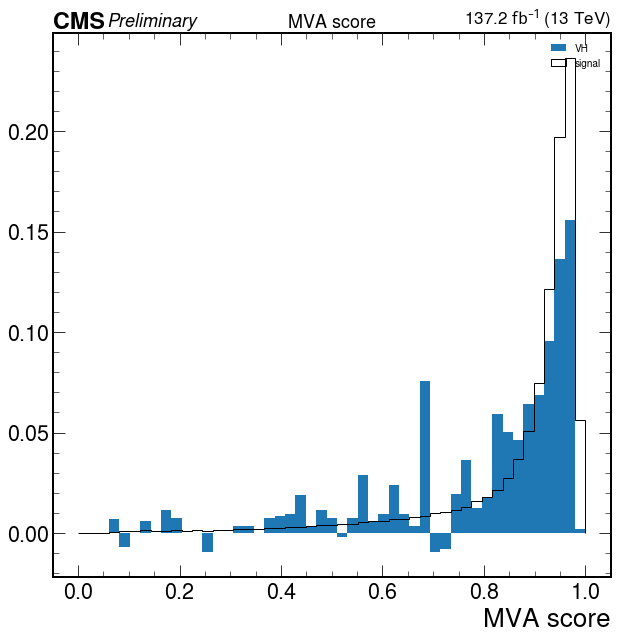

In [101]:
bdt_p_temp.run()

In [103]:
bdt_p_temp.histograms["mva_no_selection"]["VH"].integral


0.16616299410816282

### Getting into specific events

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


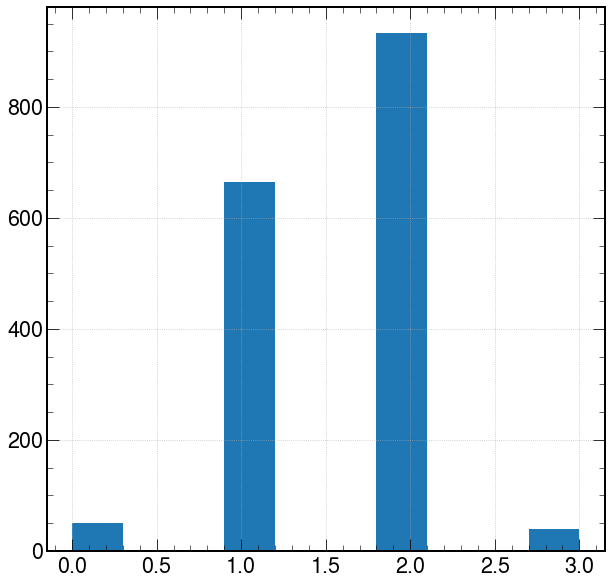

In [105]:
df.loc[(df["train_label"] == 2) & (df["process_id"] == 9.0) & (df["mva_with_gen"] > 0.6), "genZ_decayMode"].hist()
plt.savefig("mva_investigation.pdf")